# **Notebook 4: Price Analysis**

## Objectives

* **Explore Relationships Between Features and Sale Price**
  * Conduct in-depth analysis of the relationships between house attributes and the target variable, `SalePrice`.
  * Utilize visualizations and statistical methods to identify trendds and patterns that affect property values.
* **Validate Business Hypotheses**
  * Test key hypotheses about the drivers of house prices, including the influence of quality, size and location attributes.
* **Generate Insights for Client Needs**
  * Provide actionable insights to help the Client to understand the factors influencing the value of their inherited properties and similar houses in Ames, Iowa.
  * Present findings in a clear and interpretable manner for client use.
* **Prepare Visualizations for Dashboard**
  * Develop interactive and static visualizations that effectively communicate findings and lign with the dashboard requirements.

## Inputs

* **Processed Datasets**
  * `x_train_transformed.csv`: Feature-engineered and scaled training dataset for modeling and analysis.
  * `x_test_transformed.csv`: Feature-engineered and scales testing dataset for validation.
  * `y_train.csv`: Training dataset target variable (SalePrice).
  * `y_test.csv`: Testing dataset target variable (SalePrice).
* **Supplementary Data**
  * Domain knowledge and project-specific hypotheses for guiding analysis.
* **Stored Locations**
  * Datasets are located in the `outputs/datasets/processed/transformed/` and `outputs/datasets/processed/split/` directories.

## Outputs

* **Insights and Findings**
  * Detailed analysis of the relationships between key features and sale price.
  * Validation of hypotheses with supporting evidence.
* **Visualizations**
  * Scatter plots, box plots, heatmaps, and other graphical representations to highlight trends and patterns.
  * Summary visualizations prepared for dashboard integration.
* **Documentation**
  * Summary of analysis, key takeaways, and recommendations for downstream modeling and dashboard integration.

## Additional Comments

* **Context**
  * This notebook focuses on data exploration and analysis, bridhing the gap between feature engineering and model building. It provides the foundation for deriving insights and recommendations.
* **Alignment with CRISP-DM**
  * This notebook aligns with the Data Understanding and Business Understanding steps, ensuring that exploratory findings are actionable and relevant to the client's needs.
* **Next Steps**
  * The outputs from this notebook will inform the Model Training and Evaluation notebook, where predictive models will be developed and optimized.


---

## Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5'

---

## Load and Prepare Data

**Overview**
In this section, we will:
1. Load the processed datasets required for price analysis.
2. Confirm the structure and contents of the datasets to ensure readiness for analysis.
3. Handle any discrepancies, such as missing values, to ensure datasets are aligned and complete for further analysis.
4. Verify that the datasets have the expected shapes and structures.

In [6]:
import pandas as pd

# Define file paths for datasets
x_train_path = "outputs/datasets/processed/transformed/x_train_transformed.csv"
x_test_path = "outputs/datasets/processed/transformed/x_test_transformed.csv"
y_train_path = "outputs/datasets/processed/split/y_train.csv"
y_test_path = "outputs/datasets/processed/split/y_test.csv"

# Load Datasets
x_train = pd.read_csv(x_train_path)
x_test = pd.read_csv(x_test_path)
y_train = pd.read_csv(y_train_path)
y_test = pd.read_csv(y_test_path)

# Align x_test with y_test to ensure the rows match
x_test = x_test.loc[y_test.index].reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Validate the Alignment
print("Aligned x_test shape:", x_test.shape)
print("ALigned y_test shape:", y_test.shape)
assert x_test.shape[0] == y_test.shape[0], "x_test and y_test row counts do not match!"

# Check for residual missing values in x_test and handle them
print("\nChecking for missing values in testing features before handling:")
print(x_test.isnull().sum())

# Fill missing values column-wise if necessary
x_test = x_test.fillna(x_test.mean())

print("\nChecking for missing values in testing features after handling:")
print(x_test.isnull().sum())

# Display basic information about the datasets
print("Training Features Dataset:")
print(x_train.info())
print("\nTesting Features Dataset:")
print(x_test.info())
print("\nTraining Target Dataset:")
print(y_train.info())
print("\nTesting Target Dataset:")
print(y_test.info())

# Preview the first few rows of each dataset
print("\nPreview of Training Features Dataset:")
display(x_train.head())

print("\nPreview of Testing Features Dataset:")
display(x_test.head())

print("\nPreview of Training Target Dataset:")
display(y_train.head())

print("\nPreview of Testing Target Dataset:")
display(y_test.head())

# Check for missing values in training datasets
print("\nChecking for missing values in training features:")
print(x_train.isnull().sum())

print("\nChecking for missing values in training target:")
print(y_train.isnull().sum())


Aligned x_test shape: (292, 21)
ALigned y_test shape: (292, 1)

Checking for missing values in testing features before handling:
num__LotFrontage       0
num__LotArea           0
num__OpenPorchSF       0
num__MasVnrArea        0
num__BsmtFinSF1        0
num__GrLivArea         0
num__1stFlrSF          0
num__YearBuilt         0
num__YearRemodAdd      0
num__BedroomAbvGr      0
num__2ndFlrSF          0
num__BsmtUnfSF         0
num__GarageArea        0
num__GarageYrBlt       0
num__OverallCond       0
num__OverallQual       0
Age                  239
LivingLotRatio       239
FinishedBsmtRatio    239
OverallScore         239
HasPorch             239
dtype: int64

Checking for missing values in testing features after handling:
num__LotFrontage     0
num__LotArea         0
num__OpenPorchSF     0
num__MasVnrArea      0
num__BsmtFinSF1      0
num__GrLivArea       0
num__1stFlrSF        0
num__YearBuilt       0
num__YearRemodAdd    0
num__BedroomAbvGr    0
num__2ndFlrSF        0
num__BsmtUnfSF 

,num__LotFrontage,num__LotArea,num__OpenPorchSF,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__1stFlrSF,num__YearBuilt,num__YearRemodAdd,num__BedroomAbvGr,...,num__BsmtUnfSF,num__GarageArea,num__GarageYrBlt,num__OverallCond,num__OverallQual,num__Age,num__LivingLotRatio,num__FinishedBsmtRatio,num__OverallScore,cat__HasPorch_1
0,0.144140,-0.161873,-1.096169,-0.827815,0.865283,-0.292584,0.526873,0.455469,1.346063,-0.288836,...,-0.400282,-0.863837,0.192392,0.372217,-0.820445,-0.455469,-0.116096,0.887733,-0.437833,0.0
1,-0.392921,-0.304082,0.617419,-0.827815,-1.416429,0.250597,-1.040595,-0.718609,-0.439214,-0.288836,...,0.511920,-0.456264,0.272225,1.268609,-0.088934,0.718609,0.455054,-1.415946,0.858190,1.0
2,0.006402,-0.071879,-1.096169,-0.827815,-1.416429,-1.816242,-1.052445,1.988293,1.683818,0.645680,...,0.505196,-2.257169,-4.147410,1.268609,-0.820445,-1.988293,-1.409123,-1.415946,0.102176,0.0
3,-0.340186,-0.477855,-1.096169,1.276291,0.704206,0.609851,-0.394093,1.107734,1.683818,-0.288836,...,-0.915776,-1.119755,0.152476,1.268609,-0.820445,-1.107734,0.918129,0.640194,0.102176,0.0
4,-0.911425,-1.225280,-1.096169,-0.827815,0.384534,0.474436,-0.252776,1.531707,1.683818,-0.288836,...,0.532091,-0.797488,0.119212,0.372217,-0.820445,-1.531707,1.593562,0.340697,-0.437833,0.0



Preview of Testing Features Dataset:


,num__LotFrontage,num__LotArea,num__OpenPorchSF,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__1stFlrSF,num__YearBuilt,num__YearRemodAdd,num__BedroomAbvGr,...,num__BsmtUnfSF,num__GarageArea,num__GarageYrBlt,num__OverallCond,num__OverallQual,Age,LivingLotRatio,FinishedBsmtRatio,OverallScore,HasPorch
0,0.144140,-0.158460,-1.096169,-0.827815,0.755219,-0.922794,-0.126358,0.227176,-0.873470,-2.157869,...,-0.391317,-1.006014,0.205698,2.165000,-0.088934,1986.358491,0.798551,0.515713,35.037736,0.566038
1,1.204764,0.612540,0.517257,1.413568,0.902910,1.808434,0.944129,-0.783836,-0.487465,-2.157869,...,-0.312872,1.117159,0.274443,-0.524174,1.374088,1986.358491,0.798551,0.515713,35.037736,0.566038
2,-0.556568,-0.029579,-1.096169,-0.827815,-1.416429,-1.038836,-0.246639,1.401254,1.683818,-1.223352,...,0.980347,-0.551048,0.125865,0.372217,-0.820445,1986.358491,0.798551,0.515713,35.037736,0.566038
3,-0.911425,-1.225280,0.389147,-0.827815,0.585846,0.425488,-0.321073,0.748988,1.683818,-2.157869,...,0.077111,-0.266695,0.176869,1.268609,-0.088934,1986.358491,0.798551,0.515713,35.037736,0.566038
4,0.900684,0.717202,-1.096169,0.793095,0.899659,0.343995,1.186707,-1.207808,-1.114724,-1.223352,...,0.061422,2.065003,0.305489,-0.524174,2.105599,1986.358491,0.798551,0.515713,35.037736,0.566038



Preview of Training Target Dataset:


,SalePrice
0,145000
1,178000
2,85000
3,175000
4,127000



Preview of Testing Target Dataset:


,SalePrice
0,154500
1,325000
2,115000
3,159000
4,315500



Checking for missing values in training features:
num__LotFrontage          0
num__LotArea              0
num__OpenPorchSF          0
num__MasVnrArea           0
num__BsmtFinSF1           0
num__GrLivArea            0
num__1stFlrSF             0
num__YearBuilt            0
num__YearRemodAdd         0
num__BedroomAbvGr         0
num__2ndFlrSF             0
num__BsmtUnfSF            0
num__GarageArea           0
num__GarageYrBlt          0
num__OverallCond          0
num__OverallQual          0
num__Age                  0
num__LivingLotRatio       0
num__FinishedBsmtRatio    0
num__OverallScore         0
cat__HasPorch_1           0
dtype: int64

Checking for missing values in training target:
SalePrice    0
dtype: int64


**Expected Outputs:**

1. **Dataset Structure:**
   - Training Features: 1168 rows and 21 columns, all numeric and scaled (`float64`).
   - Testing Features: 292 rows and 21 columns, all numeric and scaled (`float64`).
   - Training Target: 1168 rows and 1 column (`int64`).
   - Testing Target: 292 rows and 1 column (`int64`).
2. **Data Alignment:**
   - Testing features (x_test) and target (y_test) datasets are aligned with matching rows.
3. **Handling Missing Values:**
   - Missing values in the testing features dataset (`x_test`) are addressed by filling with column-wise means.
   - The final datasets show no missing values, as confirmed by the `0` counts accross all columns.
4. **Preview of Data:**
   - The first few rows of each dataset confirm the structure, scaling and content.
   - Features are scaled, and target variables are numeric.
5. **Readiness for Analysis:**
   - Datasets are complete, aligned, and preprocessed for further exploration.

---

## Exploratory Data Analysis (EDA)

### Sale Price Distribution

Understanding the distribution of the target variable, `SalePrice`, is a crucial step in our exploratory data analysis. This section focuses on:

1. Examining the overall distribution of `SalePrice`.
2. Identifying any skewness or potential outliers.
3. Determining whether transformations are needed to improve the distribution's suitability for modeling.
4. Comparing the distributions in training and testing datasets to ensure consistency.

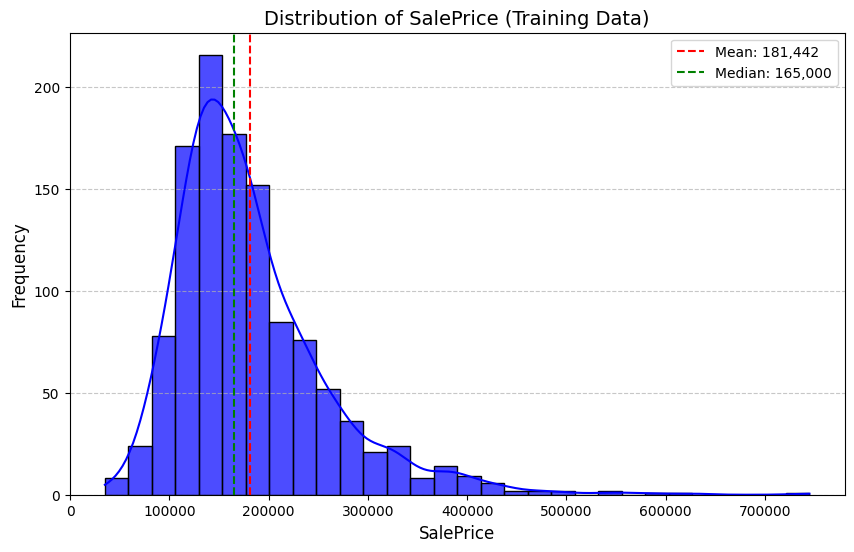

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Plot the SalePrice distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_train['SalePrice'], kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(y_train['SalePrice'].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f"Mean: {y_train['SalePrice'].mean():,.0f}")
plt.axvline(y_train['SalePrice'].median(), color='green', linestyle='dashed', linewidth=1.5, label=f"Median: {y_train['SalePrice'].median():,.0f}")
plt.title("Distribution of SalePrice (Training Data)", fontsize=14)
plt.xlabel("SalePrice", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observations:**

1. The distribution appears to be right-skewed, with most properties clustered at lower price ranges.
2. The mean (`red dashed line`) is slightly higher than the median (`green dashed line`), which is typical of a skewed distribution.
3. The long tail suggests the presence of outliers or high-value properties.
4. Skewness should be further analyzed to determine if a transformation (e.g., log) is required.

In [8]:
# Calculate skewness
saleprice_skewness = skew(y_train['SalePrice'])
print(f"Skewness of SalePrice: {saleprice_skewness:.2f}")

Skewness of SalePrice: 1.74


#### Skewness Analysis

- The calculated skewness of 'SalePrice' is **1.74**, indicating a moderately to highly right-skewed distribution.
- A skewed distribution can negatively impact certain models, such as linear regression, which assumes a normally distributed target variable.
- Applying a log transformation can help reduce skewness and normalize the distribution, improving model performance.

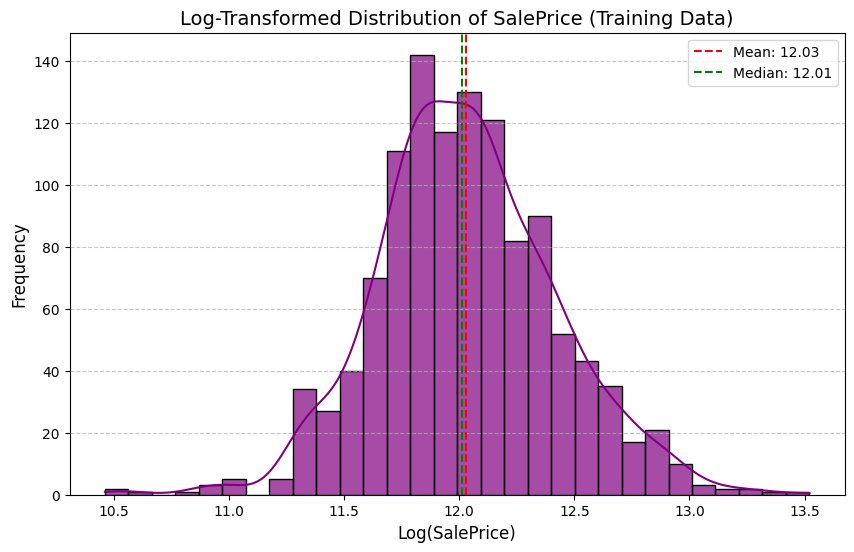

In [9]:
# Log transform SalePrice to reduce skewness
import numpy as np

y_train['LogSalePrice'] = np.log1p(y_train['SalePrice'])

# Replot the log-transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_train['LogSalePrice'], kde=True, bins=30, color='purple', alpha=0.7)
plt.axvline(y_train['LogSalePrice'].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f"Mean: {y_train['LogSalePrice'].mean():.2f}")
plt.axvline(y_train['LogSalePrice'].median(), color='green', linestyle='dashed', linewidth=1.5, label=f"Median: {y_train['LogSalePrice'].median():.2f}")
plt.title("Log-Transformed Distribution of SalePrice (Training Data)", fontsize=14)
plt.xlabel("Log(SalePrice)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Calculate skewness after log transformation
log_skewness = skew(y_train['LogSalePrice'])
print(f"Skewness of Log_transformed SalePrice: {log_skewness:.2f}")

Skewness of Log_transformed SalePrice: 0.12


#### Updated Skewness Analysis

- The log transformation significantly reduced the skewness of the `SalePrice` distribution.
- **Skewness before transformation:** **1.74** (indicating a moderately to high right-skewed distribution).
- **Skewness after transformation:** **0.12** (indicating a nearly symmetrical distribution).
- The closeness of the mean and median, as shown in the output visualization, confirms the normalized distribution of the log-transformed `SalePrice`.
- This transformation ensures that the target variable is better suited for modeling, particularly for models that assume a normally distributed target variable, such as linear regression.

### Correlation Analysis

### Pairwise Analysis

### Multivariate Analysis

### Feature Comparison Accross Quartiles

### Outlier Analysis

---

## Business Insights

### Key Drivers of Sale Price

### Client-Specific Observations

---

## Save Outputs

---

## Conclusion & Next Steps

### Conclusion

### Next Steps